## Final Project Submission

Please fill out:
* Student name: Mark Ehler
* Student pace: Part time
* Scheduled project review date/time: 7:00pm MST January 31st 2019
* Instructor name: Jeff Herman
* Blog post URL: ~~~


The following is a work up for a data set regarding housing data for King County, the greater Seattle area.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("kc_house_data.csv")
df = df.drop(['id'], axis=1)
df.head(3)
#condition is on a scale of 1-5

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [3]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [4]:
type(df.sqft_basement.iloc[2])

str

In [5]:
df.sqft_basement = df.sqft_basement.convert_objects(convert_numeric=True)
df.sqft_basement.dtypes

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


dtype('float64')

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
np.sum(df.isna())

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df[df.view.isna() == True].head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,2014-10-28,480000.0,4,2.50,3230,16171,2.0,0.0,NaN,3,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,2015-04-06,430000.0,4,2.50,2070,4310,2.0,0.0,NaN,3,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,2014-08-04,840000.0,4,1.75,2480,11010,1.0,0.0,NaN,4,9,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,2014-07-21,207950.0,2,2.00,890,5000,1.0,0.0,NaN,3,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000


In [9]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

View mean = 0.22
It's safe to assume assume the nans as 0s

In [10]:
df.view = df.view.fillna(0)
df.sqft_basement = df.sqft_basement.fillna(0)


In [11]:
df.waterfront.unique()

array([nan,  0.,  1.])

Waterfront mean =  0.007

In [12]:
df.waterfront = df.view.fillna(0)

In [13]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

The null values are one thing, but the 0s are another problem.  How do you pick a year if what 0s likely representing housing that has not been renovated?  rather than converting the 0s to the mean.  Let's bin this data and clearly mark the 0s in a class of their own.

In [97]:
df.yr_renovated = df.yr_renovated.fillna(0)


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [98]:
price = df.price



date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Let's visualize and scale our formats.

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
continuous_df = df.drop(['bedrooms', 'date',  'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'price'], axis=1)



sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:


'''for col in continuous_df.columns:
    sns.distplot(continuous_df[col], kde=True)'''

for column in continuous_df.columns:
    plt.scatter(continuous_df[column], price, label=column + " data points", color='k')
    plt.legend()
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

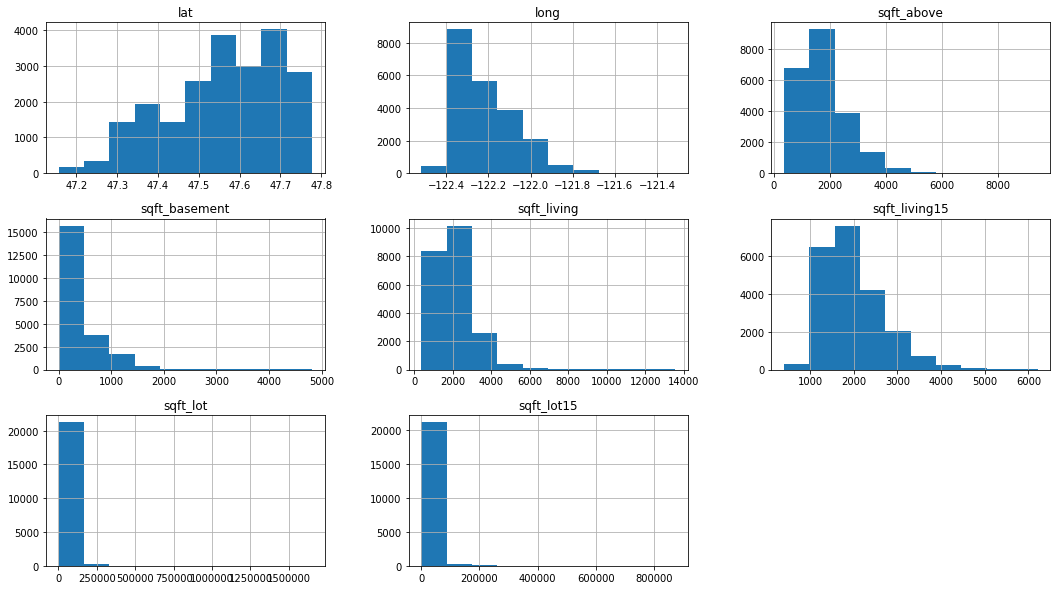

In [18]:
continuous_df.hist(figsize=(18,10) );

sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


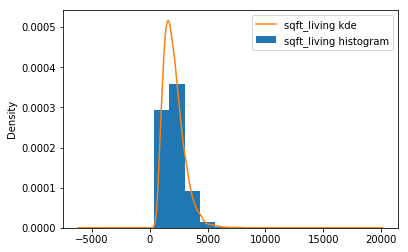

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


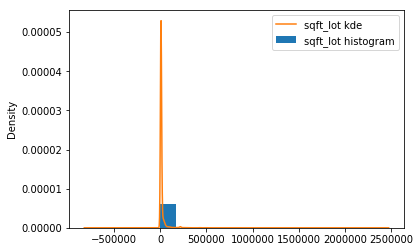

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


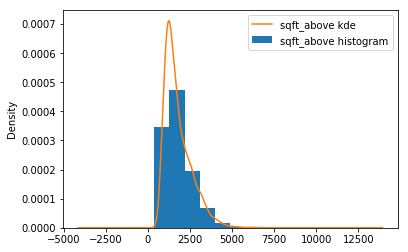

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


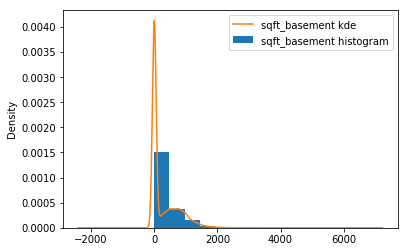

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


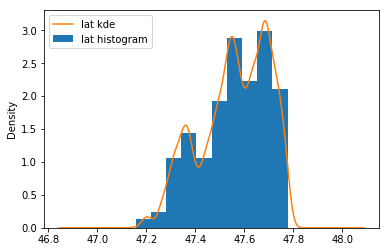

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


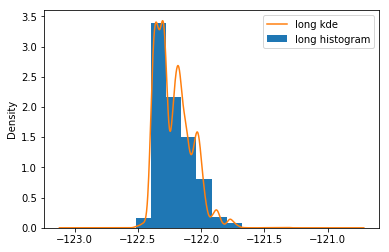

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


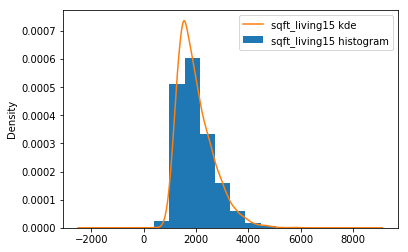

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


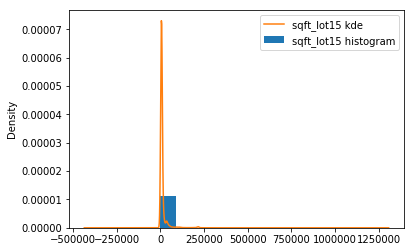

In [19]:
for column in continuous_df:
    continuous_df[column].plot.hist(normed=True, label = column+' histogram')
    continuous_df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()
    


sqft_living      0
sqft_lot         0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

sqft_living                     2
sqft_lot                        2
sqft_above                      2
sqft_basement               13281
lat                             2
long                            2
sqft_living15                   2
sqft_lot15                      2
beds_(1, 2]                     0
beds_(2, 3]                     0
beds_(3, 4]                     0
beds_(4, 5]                     0
beds_(5, 6]                     0
beds_(6, 7]                     0
beds_(7, 8]                     0
beds_(8, 9]                     0
beds_(9, 10]                    0
beds_(10, 11]                   0
beds_(11, 33]                   0
baths_(0.5, 0.75]               0
baths_(0.75, 1.0]               0
baths_(1.0, 1.25]               0
baths_(1.25, 1.5]               0
baths_(1.5, 1.75]               0
baths_(1.75, 2.0]               0
baths_(2.0, 2.25]               0
baths_(2.25, 2.5]               0
baths_(2.5, 2.75]               0
baths_(2.75, 3.0]               0
baths_(3.0, 3.

We can see some wild outliers here by looking at the kde plot tails.  There have been some outliers in the case of the categories as well.  it's time we started dealing with them.

In [104]:
continuous_df.columns
scaled = df.copy()
scaled.columns


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [105]:
scaled.loc[scaled['sqft_lot'] == max(scaled['sqft_lot'])]
scaled.loc[scaled['bedrooms'] == max(scaled['bedrooms'])]
scaled.loc[scaled['price'] == max(scaled['price'])]
for col in scaled:
    print(col, scaled[col].unique().max())



date 2015-05-27T00:00:00.000000000
price 7700000.0
bedrooms 33
bathrooms 8.0
sqft_living 13540
sqft_lot 1651359
floors 3.5
waterfront 4.0
view 4.0
condition 5
grade 13
sqft_above 9410
sqft_basement 4820.0
yr_built 2015
yr_renovated 2015.0
zipcode 98199
lat 47.7776
long -121.315
sqft_living15 6210
sqft_lot15 871200


In [106]:
scaled.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [107]:
scaled.loc[scaled['bedrooms'] == max(scaled['bedrooms'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


33 bedrooms on 1600 square feet.  Right.  So the question is do I replace the '33' with what is more likely a '3' or do I remove the whole row.  In this case, I believe that this unit with 3 beds could be worth 640 thousand. I'll replace.

In [108]:
scaled.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [109]:
scaled['bedrooms'] = scaled['bedrooms'].replace(33,3)


In [110]:
scaled.loc[df['sqft_living'] == max(scaled['sqft_living'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,4.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


If anything the price is too low.  Looking at the price data it is an outlier in that regard so I think it's best to drop this row.


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [112]:
scaled = scaled.drop([0,12764])
 #does doing this mean I have to reindex later?

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [114]:
scaled.loc[scaled['bathrooms'] == max(scaled['bathrooms'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,3.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


These people could house a family in their bathrooms

In [115]:
scaled.loc[scaled['sqft_basement'] == max(scaled['sqft_basement'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,4.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.557,-122.21,3270,10454


Why would you get property on Lake Washington and put half of your house underground.  As much as this doesn't make sense, I have no good reason to judge what rich eccentrics do with their money.  Maybe this is Elon Musk's bomb shelter.


At this point I've had my fun snooping and can't think of anything else at the moment to spy on.

In [116]:
scaled.loc[scaled['sqft_lot15'] == max(scaled['sqft_lot15'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,2015-01-07,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200


I looked this GPS up and found it to be way off the road in Carnation, WA.  It's east of Bellevue,  east of Redmond.  This location hardly seems relative so we will clean it.

In [117]:
scaled = scaled.drop([0,9705])
###DOESN"T WORK

KeyError: '[0] not found in axis'

In [118]:
scaled.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [119]:
scaled.loc[scaled['sqft_lot15'] == max(scaled['sqft_lot15'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,2015-01-07,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200


In [120]:
scaled.zipcode[scaled.zipcode == 98014].value_counts()

98014    124
Name: zipcode, dtype: int64

Another unnamed road in West Caranation.

In [121]:
scaled = scaled.drop([0,20436])
###DOESN"T WORK --  I don't feel solid about this method

KeyError: '[0] not found in axis'

In [122]:
scaled.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [123]:
continuous_df = scaled.drop(['bedrooms', 'date',  'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'price'], axis=1)



Let's replot our visualizations and scale them and see how things have changed.

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


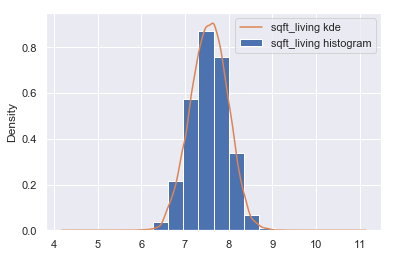

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


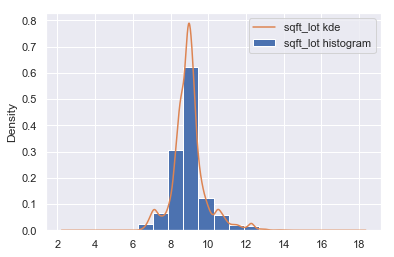

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


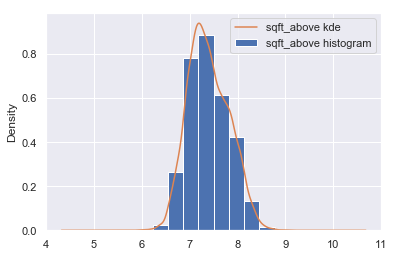

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


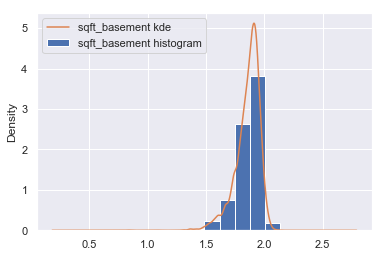

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


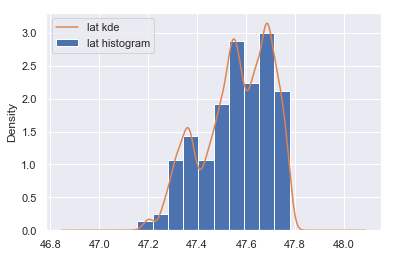

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


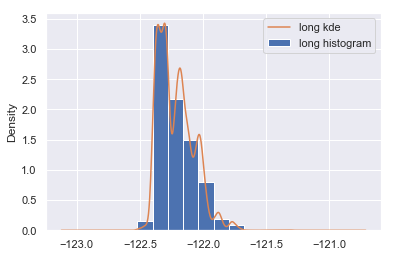

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


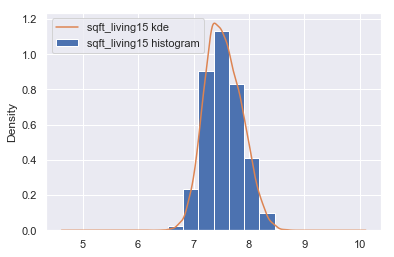

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


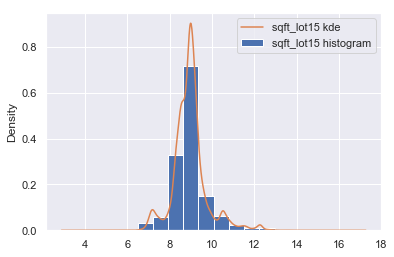

In [136]:
import matplotlib.pyplot as plt
for column in continuous_df:
    scaled[column].plot.hist(normed=True, label = column+' histogram')
    scaled[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

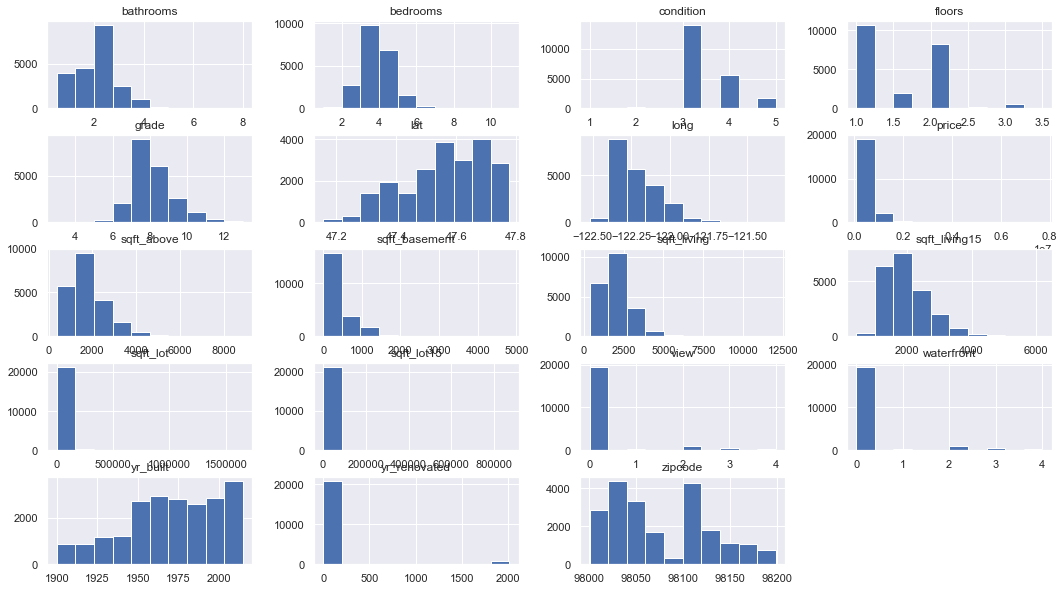

In [125]:
scaled.hist(figsize=(18,10) );

In [126]:
scaled['sqft_living'] = np.log(scaled['sqft_living'])

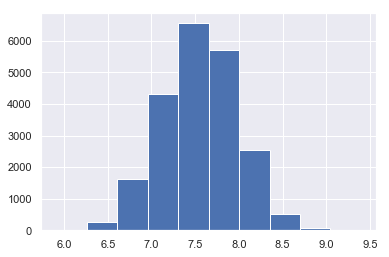

In [127]:
scaled['sqft_living'].hist()

In [132]:
scaled.columns
scaled.isna().sum()

date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement    13279
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [129]:
scaled['sqft_basement'] = np.log(scaled['sqft_basement'])
scaled['sqft_lot'] = np.log(scaled['sqft_lot'])
scaled['sqft_living15'] = np.log(scaled['sqft_living15'])
scaled['sqft_lot15'] = np.log(scaled['sqft_lot15'])
scaled['sqft_above'] = np.log(scaled['sqft_above'])
#got an error dividing by zero while preforming the log function on sqft_basement


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [130]:
scaled[scaled['sqft_basement'] == 0] = 1

In [131]:
scaled['sqft_basement'] = np.log(scaled['sqft_basement'])

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [44]:
#making a copy of my geo data here...?
geo_data = df[['lat', 'long', 'zipcode']].copy()



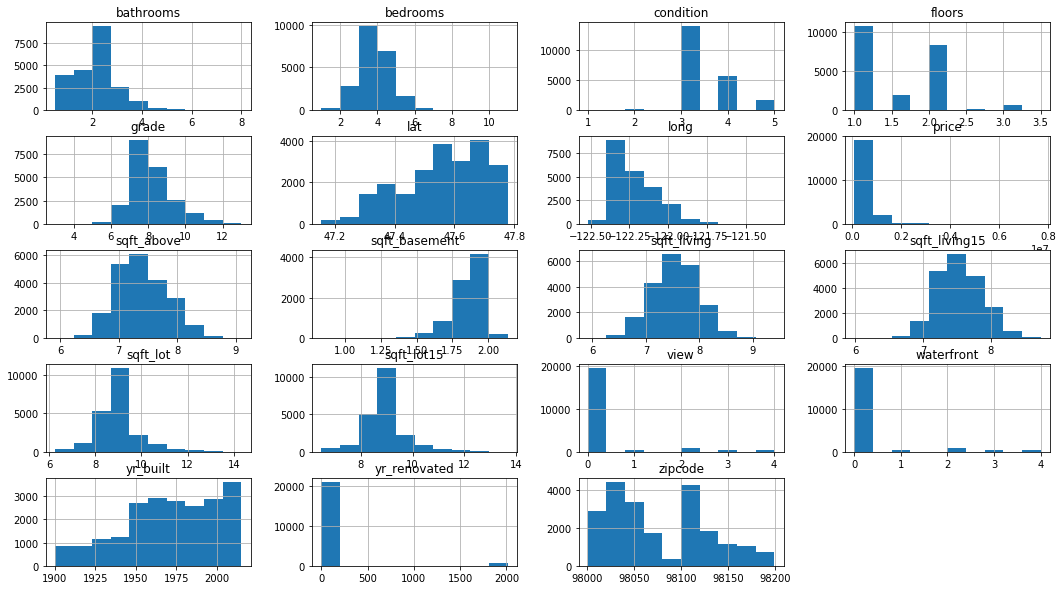

In [45]:
scaled.hist(figsize=(18,10) );

In [91]:
#

scaled['lat'] = (scaled['lat'] - scaled['lat'].min()) / (scaled['lat'].max() - scaled['lat'].min())
scaled['long'] =  (scaled['long'] - scaled['long'].min()) / (scaled['long'].max() - scaled['long'].min())
scaled['sqft_above'] =  (scaled['sqft_above'] - scaled['sqft_above'].min()) / (scaled['sqft_above'].max() - scaled['sqft_above'].min())
scaled['sqft_living'] =  (scaled['sqft_living'] - scaled['sqft_living'].min()) / (scaled['sqft_living'].max() - scaled['sqft_living'].min())
scaled['sqft_lot'] =  (scaled['sqft_lot'] - scaled['sqft_lot'].min()) / (scaled['sqft_lot'].max() - scaled['sqft_lot'].min())
scaled['sqft_lot15'] =  (scaled['sqft_lot15'] - scaled['sqft_lot15'].min()) / (scaled['sqft_lot15'].max() - scaled['sqft_lot15'].min())
scaled['sqft_living15'] =  (scaled['sqft_living15'] - scaled['sqft_living15'].min()) / (scaled['sqft_living15'].max() - scaled['sqft_living15'].min())


#


date                            2
price                           2
bedrooms                        2
bathrooms                       2
sqft_living                     2
sqft_lot                        2
floors                          2
waterfront                      2
view                            2
condition                       2
grade                           2
sqft_above                      2
sqft_basement               13281
yr_built                        2
yr_renovated                    2
zipcode                         2
lat                             2
long                            2
sqft_living15                   2
sqft_lot15                      2
beds_(1, 2]                     0
beds_(2, 3]                     0
beds_(3, 4]                     0
beds_(4, 5]                     0
beds_(5, 6]                     0
beds_(6, 7]                     0
beds_(7, 8]                     0
beds_(8, 9]                     0
beds_(9, 10]                    0
beds_(10, 11] 

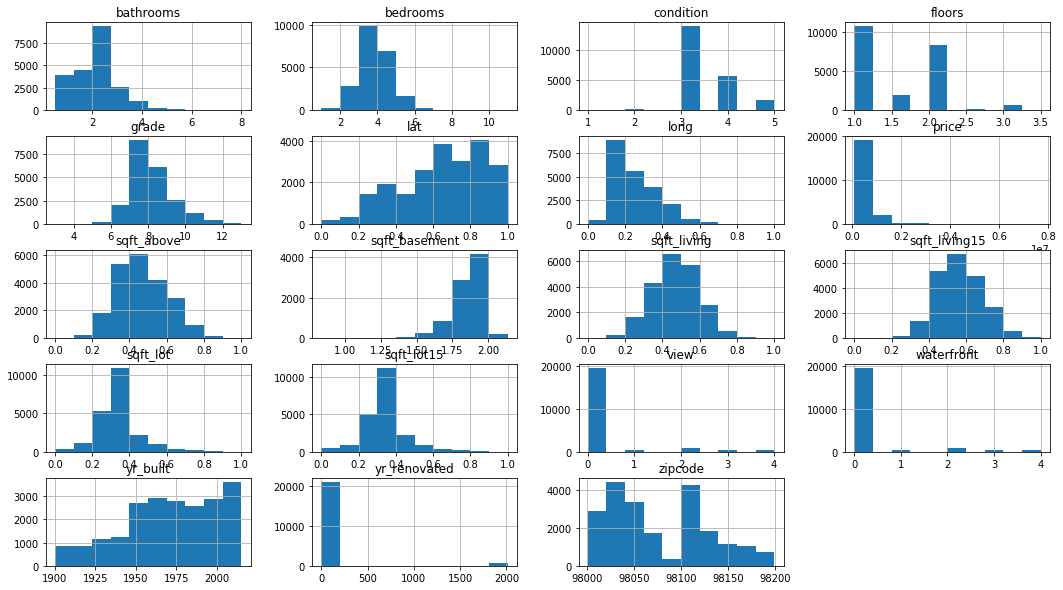

In [47]:
scaled.hist(figsize=(18,10) );

We have quite a few categories in our dataframe.  Let's handle those.

In [48]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
categories = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']]
#categories = [categories[col].astype('category') for col in categories.columns]
#returns a list. duh.
for col in categories.columns:
    categories[col] = categories[col].astype('category')

categories.info()


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
bedrooms        21597 non-null category
bathrooms       21597 non-null category
floors          21597 non-null category
waterfront      21597 non-null category
view            21597 non-null category
condition       21597 non-null category
grade           21597 non-null category
yr_built        21597 non-null category
yr_renovated    21597 non-null category
zipcode         21597 non-null category
dtypes: category(10)
memory usage: 226.1 KB


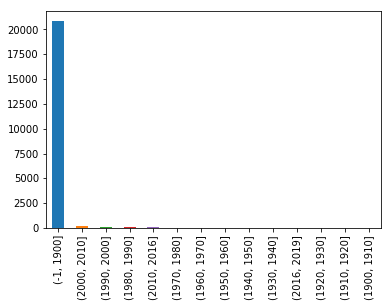

In [50]:
#bining yr_build and yr_renovated

built_bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2016, 2019]
renovated_bins = [-1] + built_bins

built = pd.cut(categories['yr_built'], built_bins)
renovated = pd.cut(categories['yr_renovated'], renovated_bins)
built = built.cat.as_unordered()
renovated = renovated.cat.as_unordered()

renovated.value_counts().plot(kind='bar')


Whoa! So, the vast majority of houses have not been renovated.
I should have caught that earlier but this poses an interesting question.
Should the 0s be thrown out. ploted w/o zeros we a few relevant details
We could also condense renovated into is/is-not renovated category.

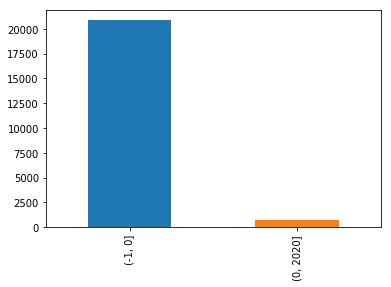

In [51]:
renovated_bins = [-1,0,2020]
renovated = pd.cut(categories['yr_renovated'], renovated_bins)
renovated = renovated.cat.as_unordered()
renovated.value_counts().plot(kind='bar')
#Still pretty overwhelming, but lets go with it, maybe renovation will have affect on the price.

Let's set up some dummy variables.

In [52]:
#DON'T run this cell.  Lots of failed attempts

'''
for idx, col in enumerate(categories):
    categories[col] = pd.get_dummies(categories[col], prefix=[col], drop_first=True)
categories.columns

I tried to create a for loop that takes each column of the df and makes it it's own df(list of a single/all dfs)
and then gets dummies and
concats those dfs back into one big_ole cat df


for idx, col in enumerate(categories):
    print(idx, col)
    
df_list = []
#maybe needs a counter to store the dfs before offloading into a new df
for idx, col in enumerate(categories):
    i = pd.DataFrame(categories[col])
    i = pd.get_dummies(categories[col], prefix=col, drop_first=True)
    df_list.append(i)
'''

#my attempt at a f(x) get dummies and eventually convert the series to a df of the new categories  

'''
for idx, col in enumerate(categories):
    bins = list(categories[k].unique())
    bins.append(0)
    #would like a for loop to do everything for me but cant get this code to work
    binned = pd.cut(categories.columns[idx], bins)
    binned = binned.cat.as_unordered()
    result = pd.get_dummies(binned, prefix=col, drop_first=False)
    spread.join(result)
'''
    

'\nfor idx, col in enumerate(categories):\n    bins = list(categories[k].unique())\n    bins.append(0)\n    #would like a for loop to do everything for me but cant get this code to work\n    binned = pd.cut(categories.columns[idx], bins)\n    binned = binned.cat.as_unordered()\n    result = pd.get_dummies(binned, prefix=col, drop_first=False)\n    spread.join(result)\n'

In [53]:
spread_categories = pd.DataFrame().reindex_like(categories)

def bining(series):
    bins = list(series.unique())
    bins = [-1] + bins
    bins.sort()
    return bins
    
print(bining(categories['bathrooms']))



[-1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


It doesn't seem like we should be able to round the baths since we would
be losing data that realtors might find useful later, maybe a 3/4 bath is
just as profitable as a 4/4 bath.

In [54]:
'''
def make_dummies(series):
    processing = pd.cut(categories.series, bining(categories.series))
    processing = processing.cat.as_unordered()
    processed = pd.get_dummies(processing, prefix=str(series), drop_first=True)
    return processed
'''

beds = pd.cut(categories.bedrooms, bining(categories.bedrooms))
beds = beds.cat.as_unordered()
beds = pd.get_dummies(beds, prefix='beds', drop_first=True)
spread_categories = beds

spread_categories.columns

Index(['beds_(1, 2]', 'beds_(2, 3]', 'beds_(3, 4]', 'beds_(4, 5]',
       'beds_(5, 6]', 'beds_(6, 7]', 'beds_(7, 8]', 'beds_(8, 9]',
       'beds_(9, 10]', 'beds_(10, 11]', 'beds_(11, 33]'],
      dtype='object')

I would have liked my code to be more succinct, but we can do this the hard way (or is it the easy way?)

In [55]:
categories.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [56]:
baths = pd.cut(categories.bathrooms, bining(categories.bathrooms))
baths = baths.cat.as_unordered()
baths = pd.get_dummies(baths, prefix='baths', drop_first=True)

floors = pd.cut(categories.floors, bining(categories.floors))
floors = floors.cat.as_unordered()
floors = pd.get_dummies(floors, prefix='floors', drop_first=True)

waterfront = pd.cut(categories.waterfront, bining(categories.waterfront))
waterfront = waterfront.cat.as_unordered()
waterfront = pd.get_dummies(waterfront, prefix='waterfront', drop_first=True)

view = pd.cut(categories.view, bining(categories.view))
view = view.cat.as_unordered()
view = pd.get_dummies(view, prefix='view', drop_first=True)

condition = pd.cut(categories.condition, bining(categories.condition))
condition = condition.cat.as_unordered()
condition = pd.get_dummies(condition, prefix='condition', drop_first=True)

grade = pd.cut(categories.grade, bining(categories.grade))
grade = grade.cat.as_unordered()
grade = pd.get_dummies(grade, prefix='grade', drop_first=True)

zipcode = pd.cut(categories.zipcode, bining(categories.zipcode))
zipcode = zipcode.cat.as_unordered()
zipcode = pd.get_dummies(zipcode, prefix='zipcode', drop_first=True)


built = pd.get_dummies(built, prefix='year built', drop_first=True)


renovated = pd.get_dummies(renovated, prefix='year renovated', drop_first=True)

In [57]:
categories_spread = pd.concat([beds, baths, floors, waterfront, view, condition, grade, zipcode, built, renovated], axis=1)
len(categories_spread.columns)

148

I chose to deal with a few outliers before pre processing my data.  Now the time has come.  Let's look at some R^2 values and QQ plots to see how effective our data is at predicting price.

In [137]:

scaled =  pd.concat([scaled, categories_spread], axis=1)
final = scaled.drop(['date', 'lat', 'long'], axis=1)

#Taking the data out at this point only because I don't yet know how to handle it


y = pd.DataFrame(final.price)
X = final.drop(['price'], axis=1)
final.isna().sum()


price                           2
bedrooms                        2
bathrooms                       2
sqft_living                     2
sqft_lot                        2
floors                          2
waterfront                      2
view                            2
condition                       2
grade                           2
sqft_above                      2
sqft_basement               13281
yr_built                        2
yr_renovated                    2
zipcode                         2
sqft_living15                   2
sqft_lot15                      2
beds_(1, 2]                     0
beds_(2, 3]                     0
beds_(3, 4]                     0
beds_(4, 5]                     0
beds_(5, 6]                     0
beds_(6, 7]                     0
beds_(7, 8]                     0
beds_(8, 9]                     0
beds_(9, 10]                    0
beds_(10, 11]                   0
beds_(11, 33]                   0
baths_(0.5, 0.75]               0
baths_(0.75, 1

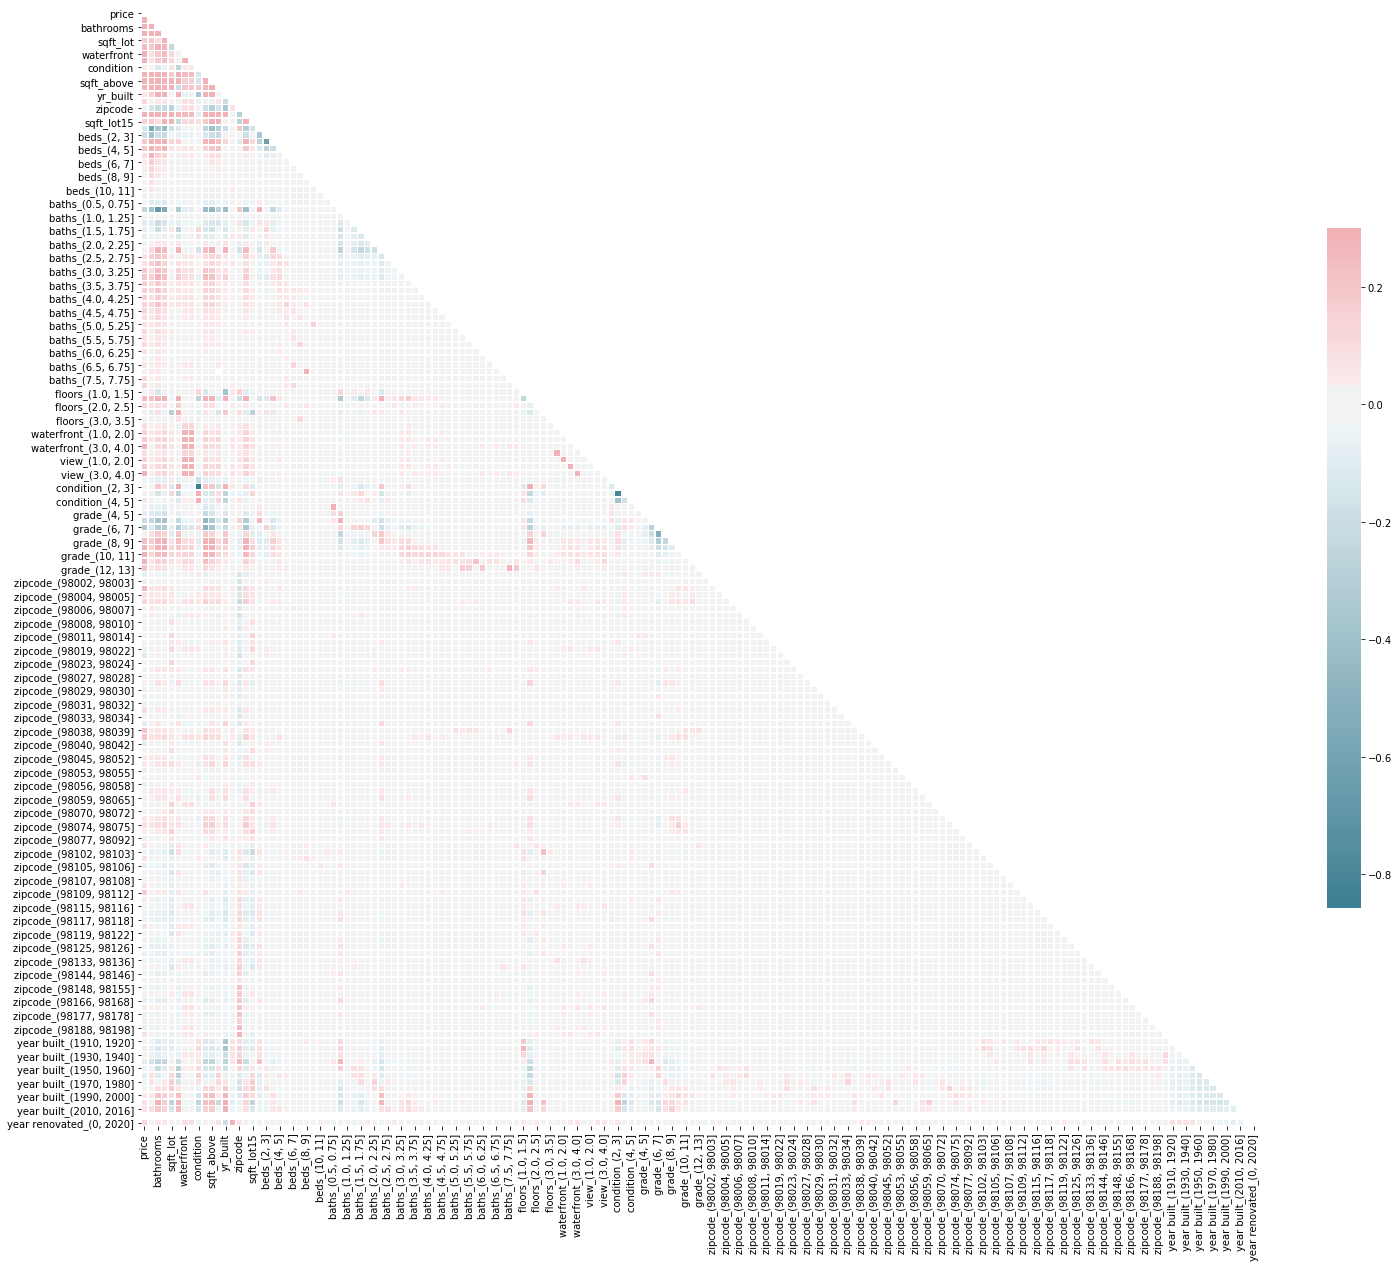

In [62]:
corr = final.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

This is cool, and pardon me for the hard to read visualization.  I'll get better.  However, I think it's helpful to see the entire dataset together because there are a few large patterns going on here.  look at the swath of red in the high grade area as an example.  The few outstanding strongly negative correlations that pop out here and there around condtiion and square feet of the lots in the neighborhood.

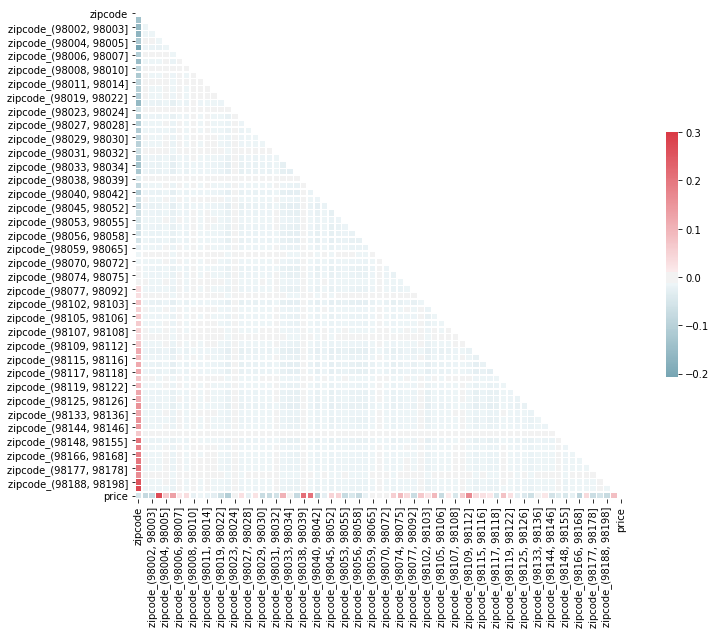

In [63]:
zipcode_corr = final.filter(regex='zipcode+', axis=1)
zipcode_corr = pd.concat([zipcode_corr, y], axis=1)

corr = zipcode_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})



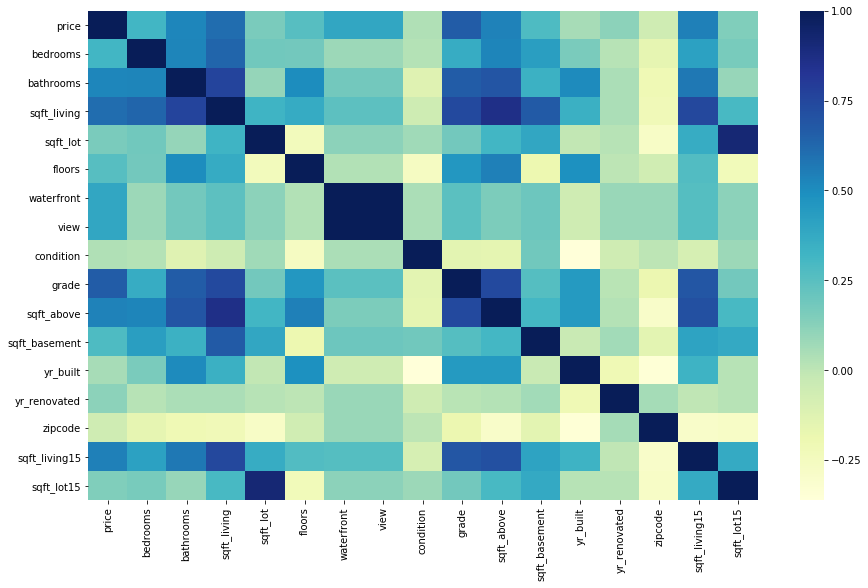

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(15,9))

sns.heatmap(final.iloc[:,0:17].corr(), cmap="YlGnBu")

In [65]:
#make an annotated heatmap with mean prices rounded as annotations for each 

sns.set()
zipcode_heat = zipcode_corr[['price', 'zipcode']].copy()
#zipcode_corr = zipcode_corr.pivot("")

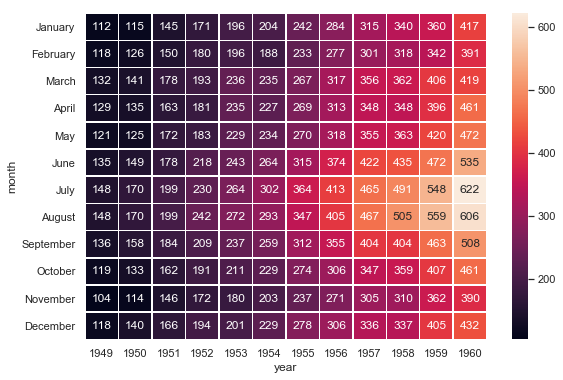

In [66]:
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)


In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

import statsmodels.stats.api as sms

In [68]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       ...
       'year built_(1940, 1950]', 'year built_(1950, 1960]',
       'year built_(1960, 1970]', 'year built_(1970, 1980]',
       'year built_(1980, 1990]', 'year built_(1990, 2000]',
       'year built_(2000, 2010]', 'year built_(2010, 2016]',
       'year built_(2016, 2019]', 'year renovated_(0, 2020]'],
      dtype='object', length=164)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~bedrooms
-------------------------------------------------------------------------------------


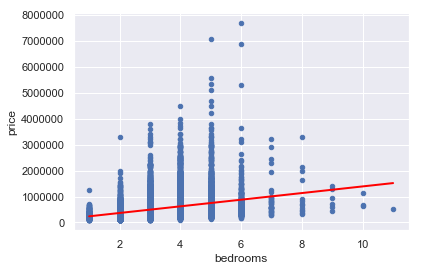

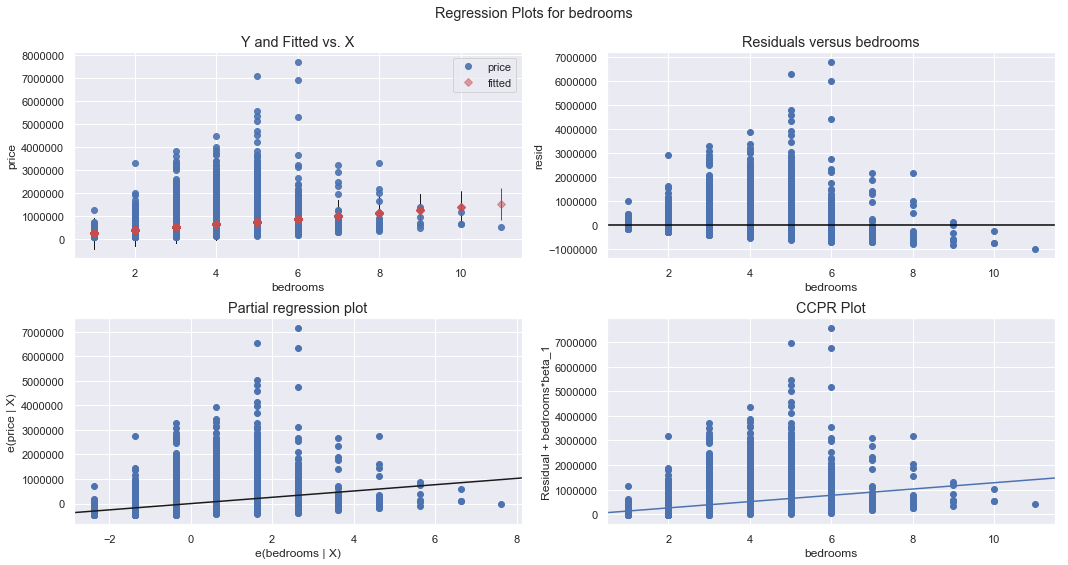

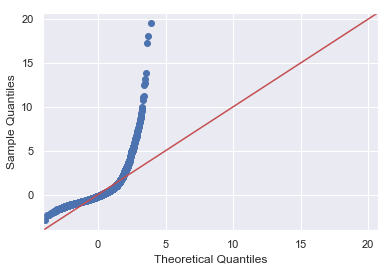

Press Enter to continue...
King County - Regression Analysis and Diagnostics for formula: Price~bathrooms
-------------------------------------------------------------------------------------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


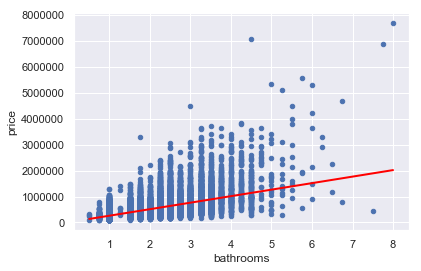

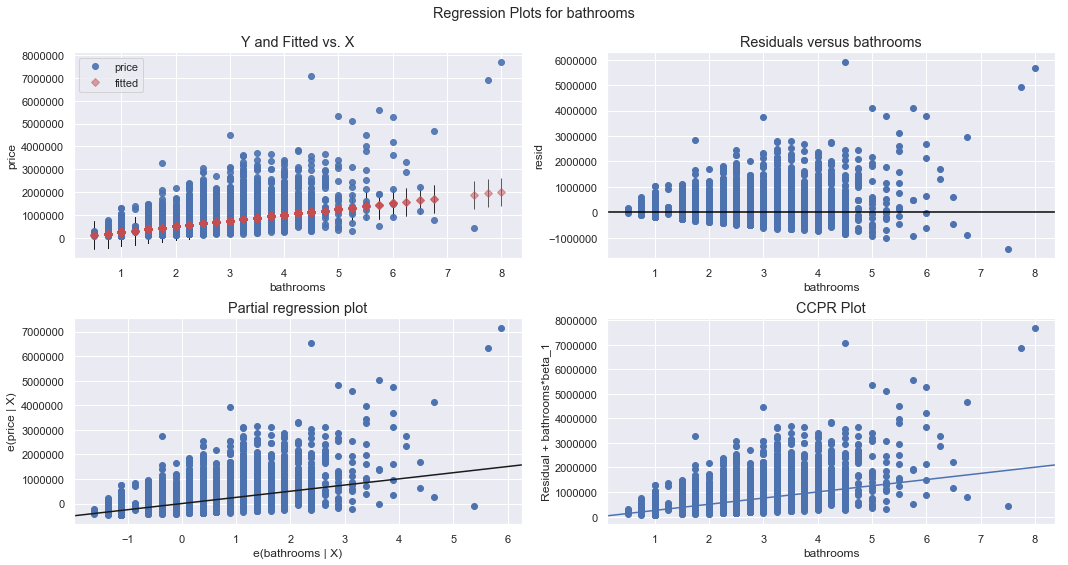

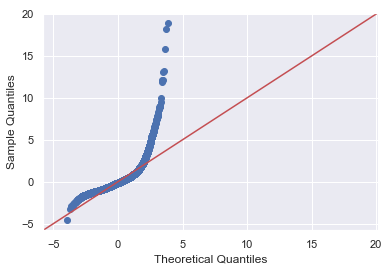

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_living
-------------------------------------------------------------------------------------


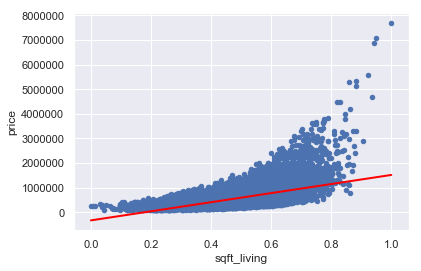

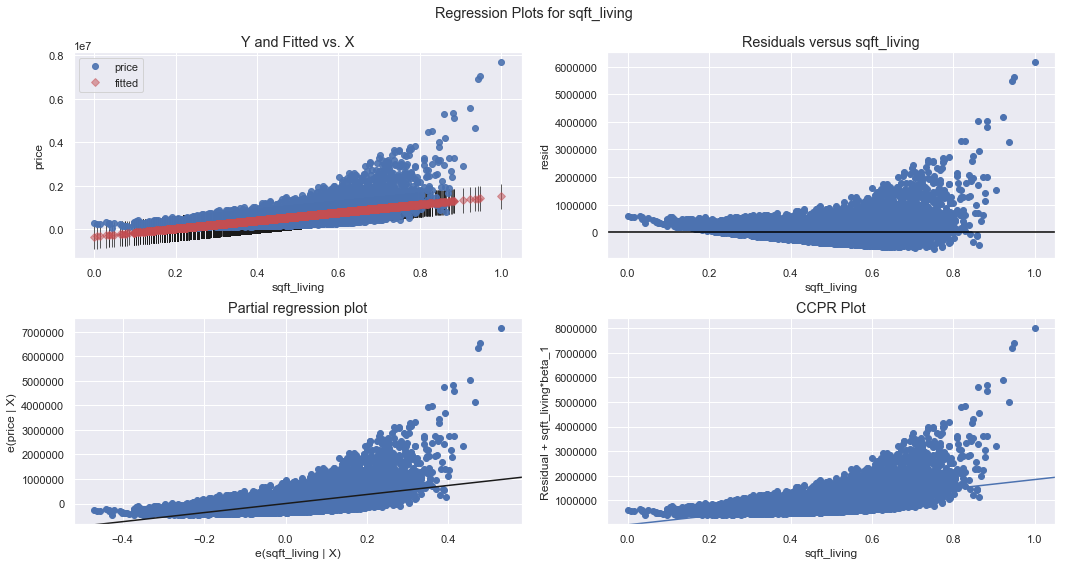

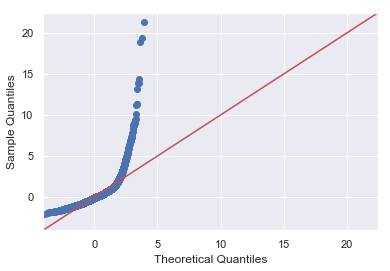

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_lot
-------------------------------------------------------------------------------------


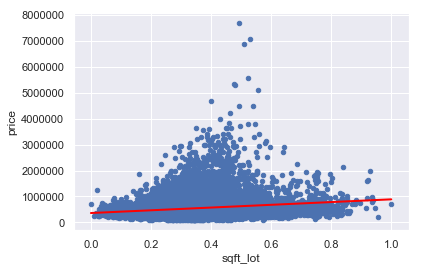

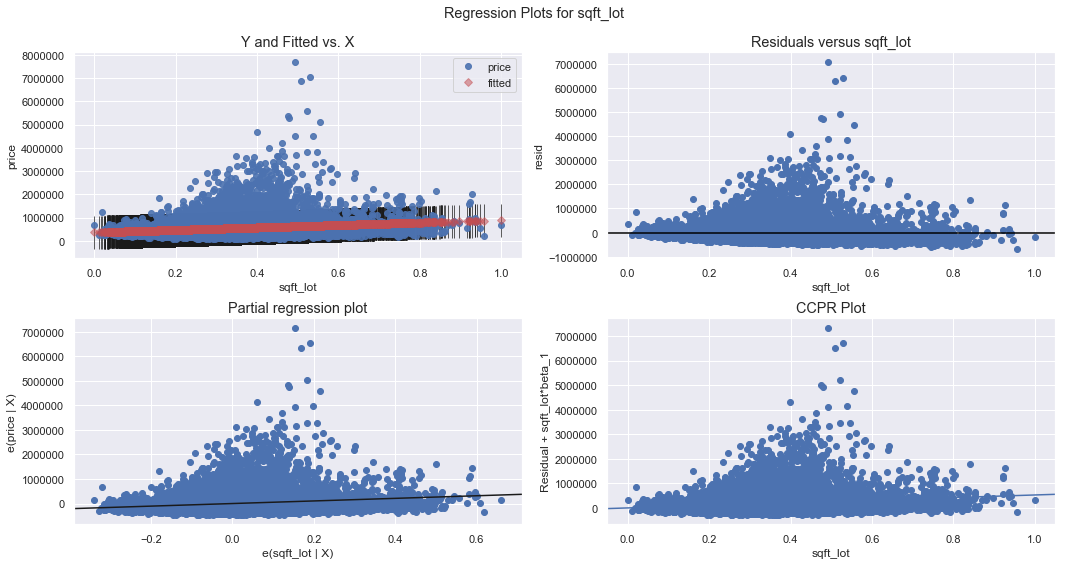

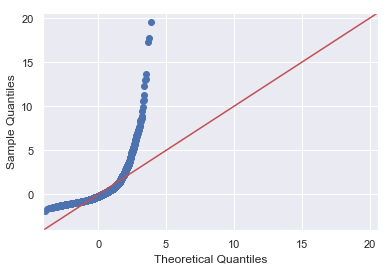

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~floors
-------------------------------------------------------------------------------------


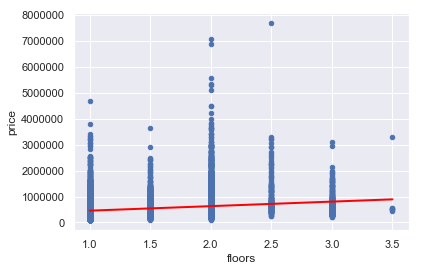

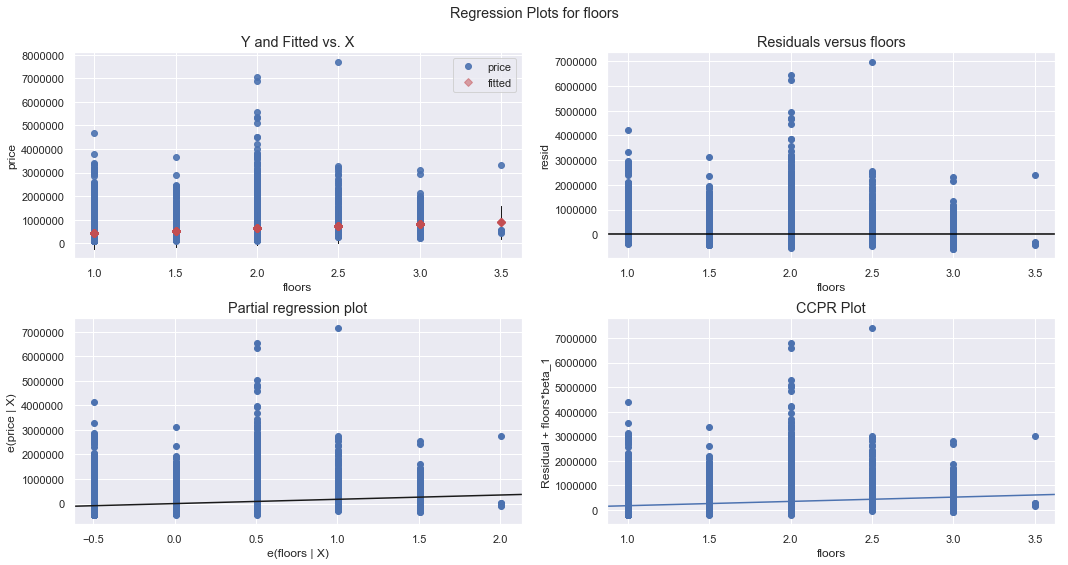

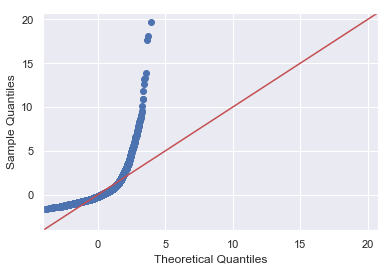

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~waterfront
-------------------------------------------------------------------------------------


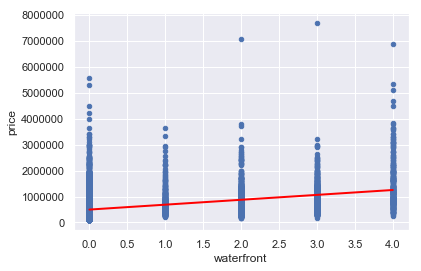

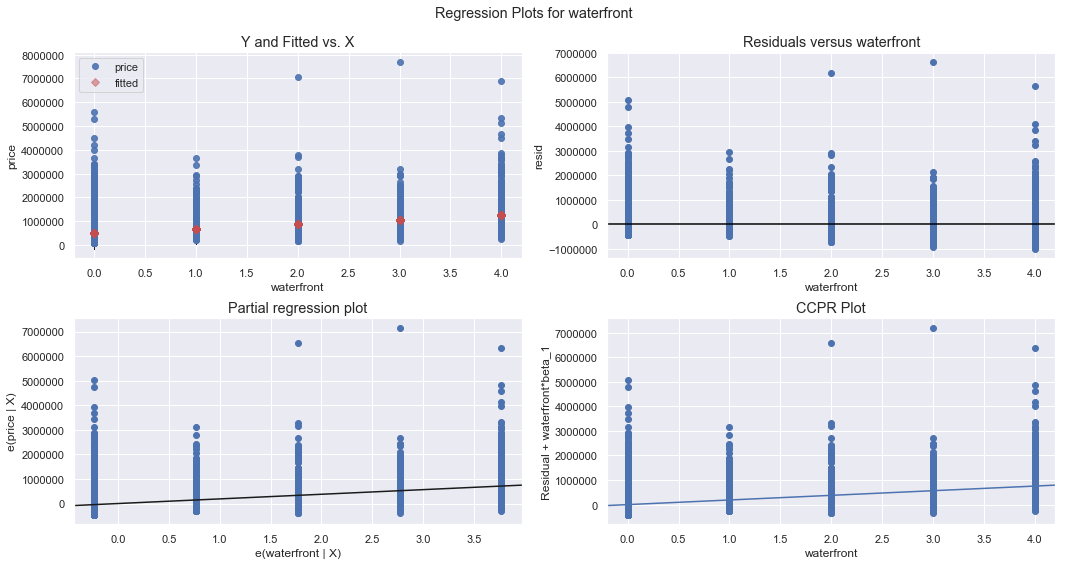

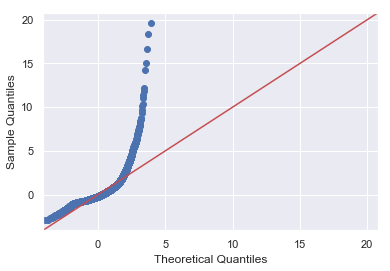

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~view
-------------------------------------------------------------------------------------


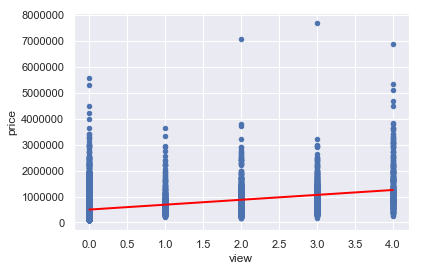

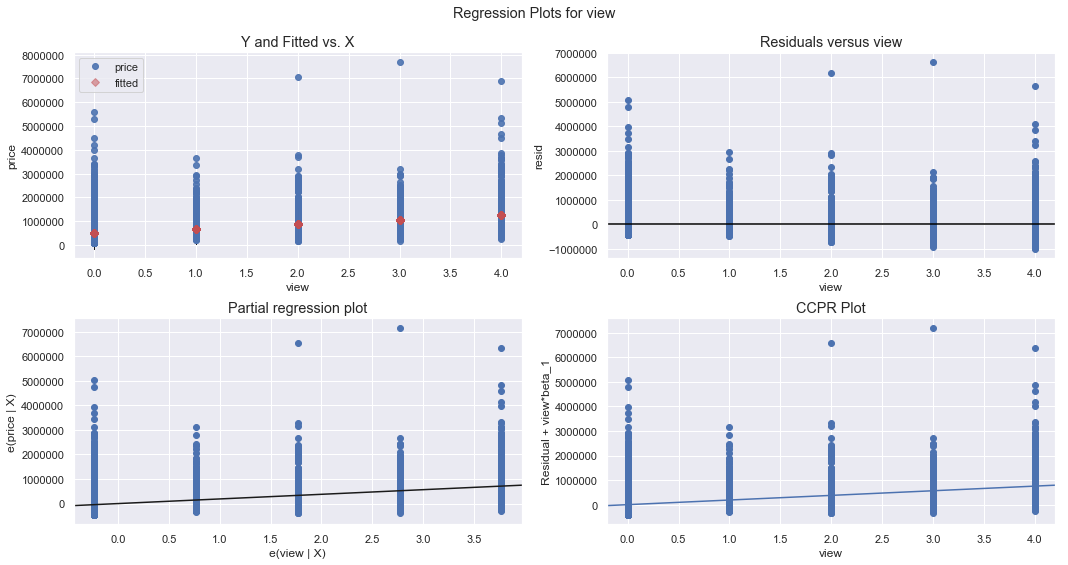

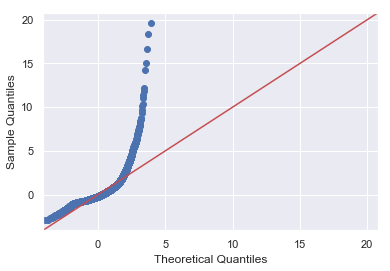

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~condition
-------------------------------------------------------------------------------------


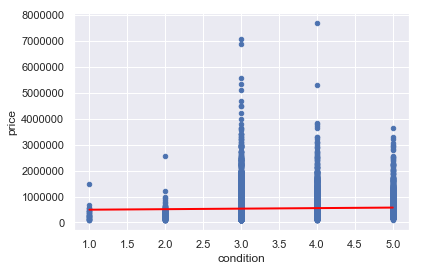

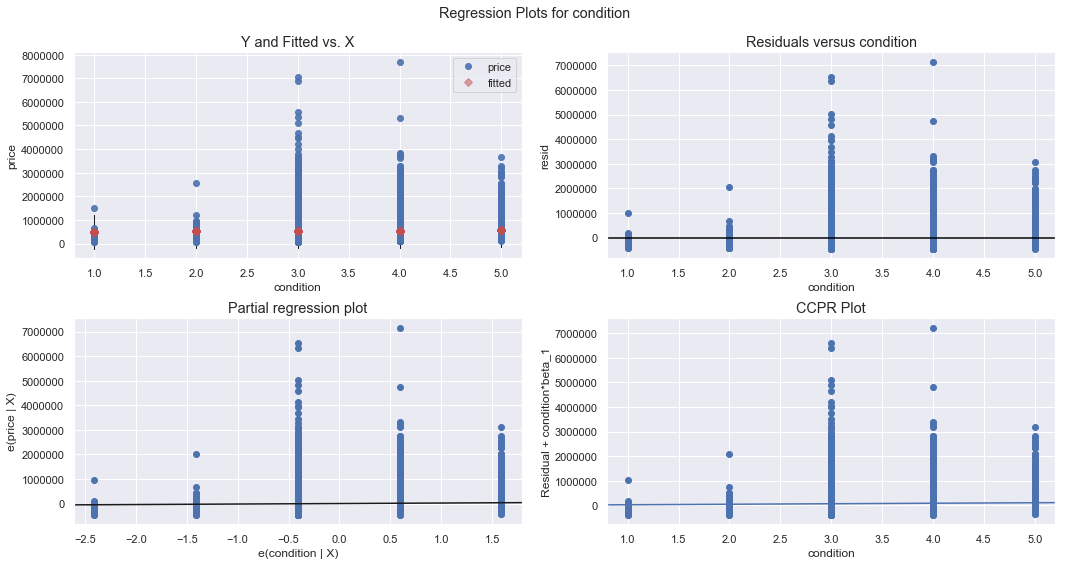

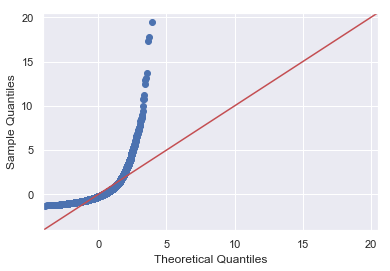

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~grade
-------------------------------------------------------------------------------------


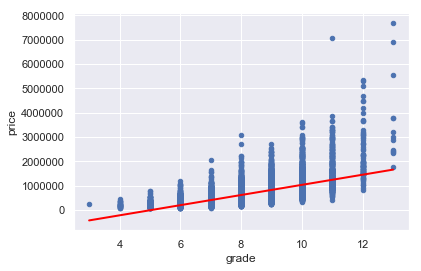

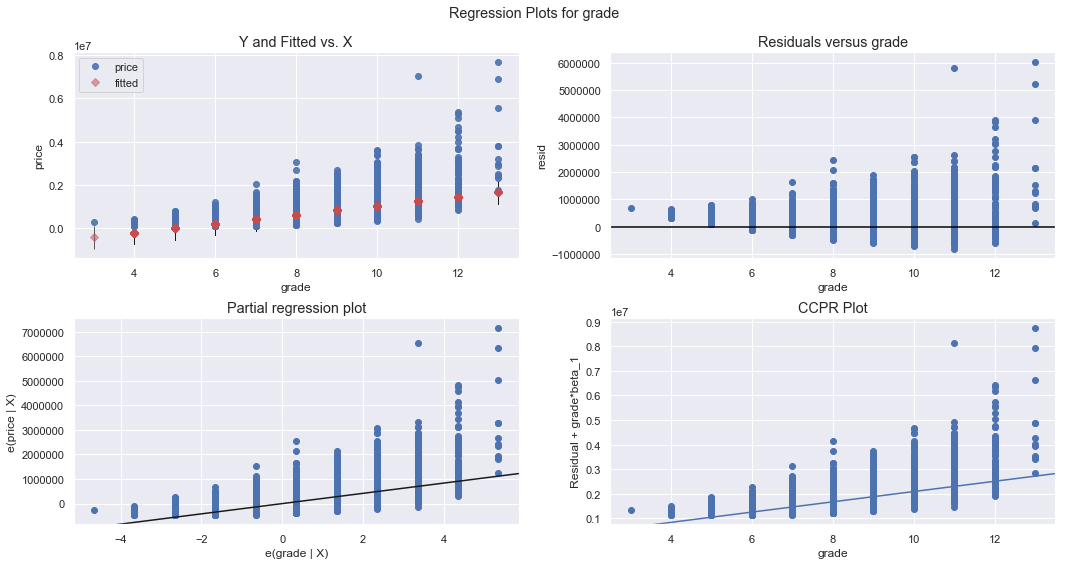

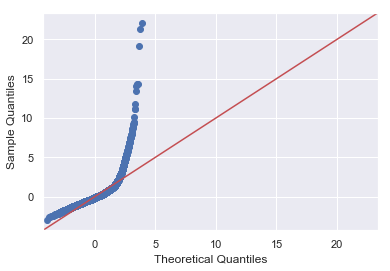

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_above
-------------------------------------------------------------------------------------


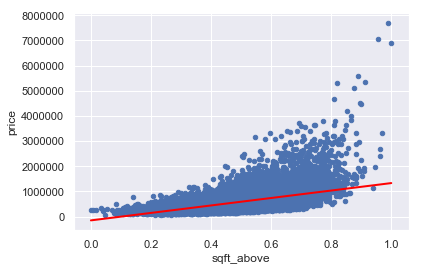

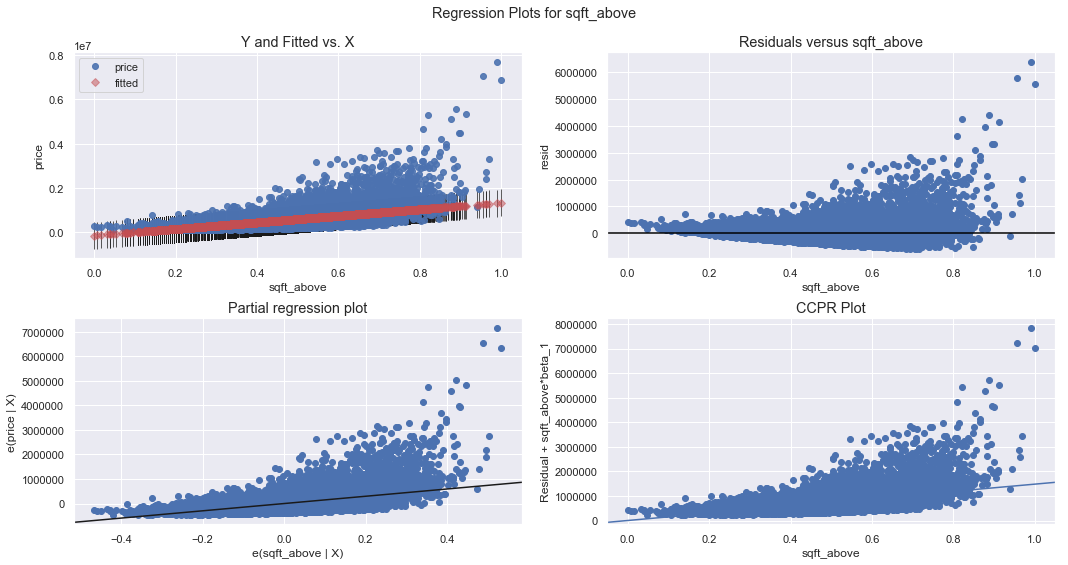

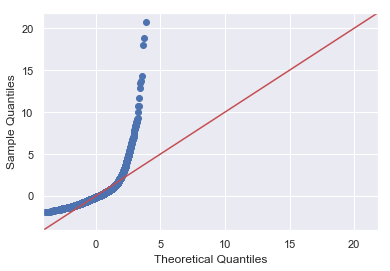

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_basement
-------------------------------------------------------------------------------------


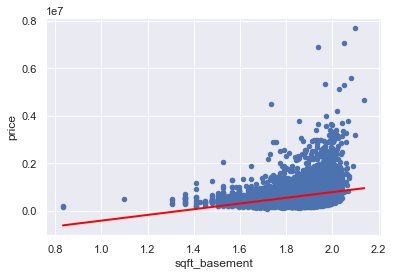

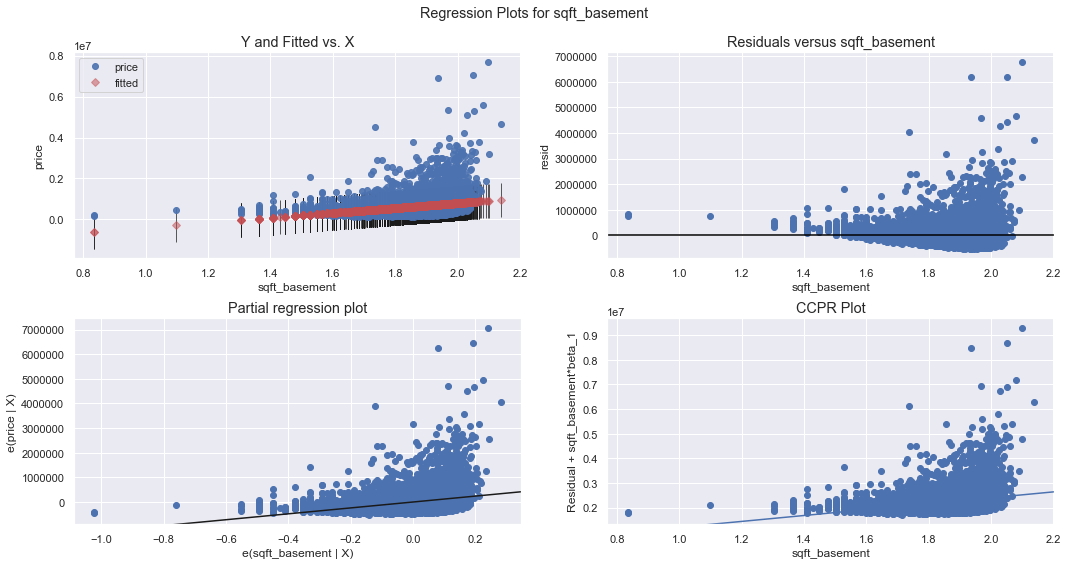

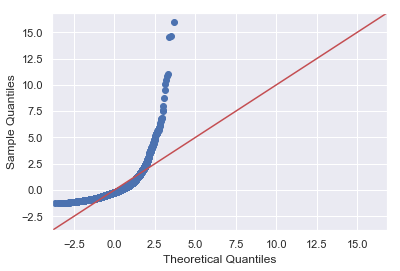

Press Enter to continue...
King County - Regression Analysis and Diagnostics for formula: Price~yr_built
-------------------------------------------------------------------------------------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


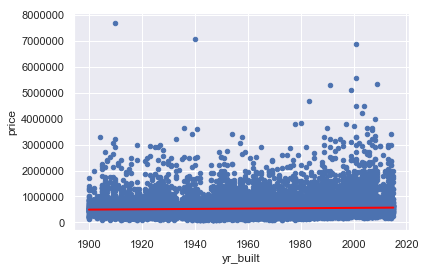

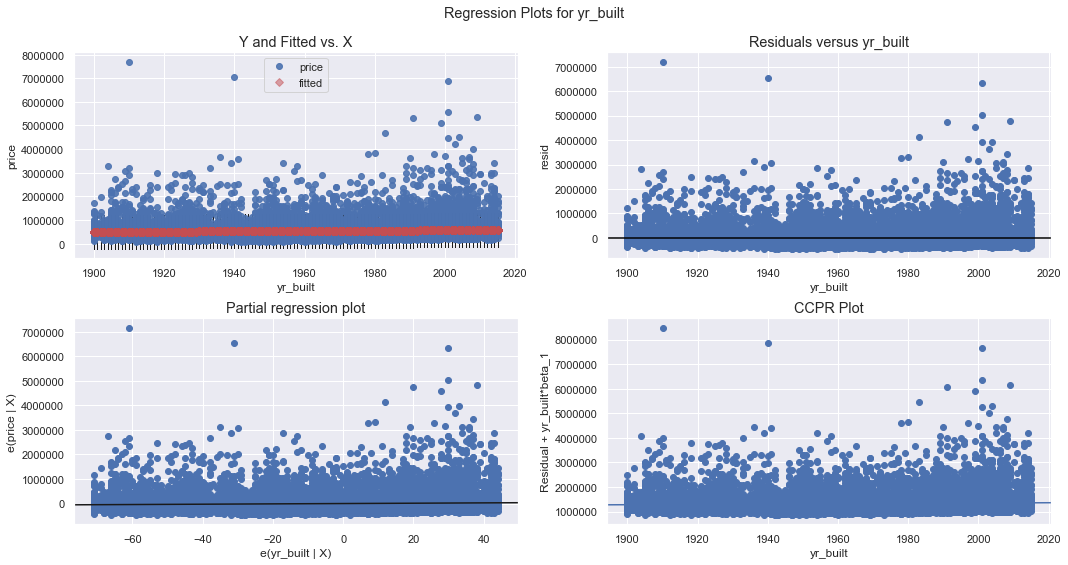

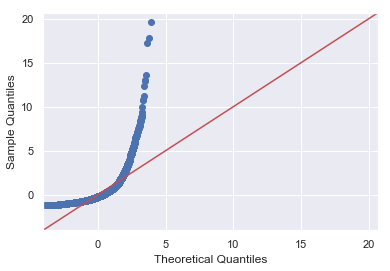

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~yr_renovated
-------------------------------------------------------------------------------------


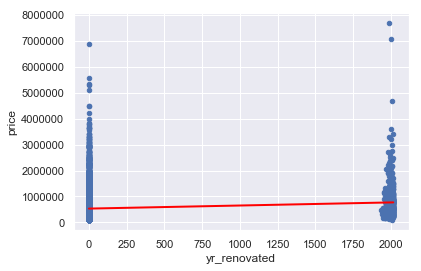

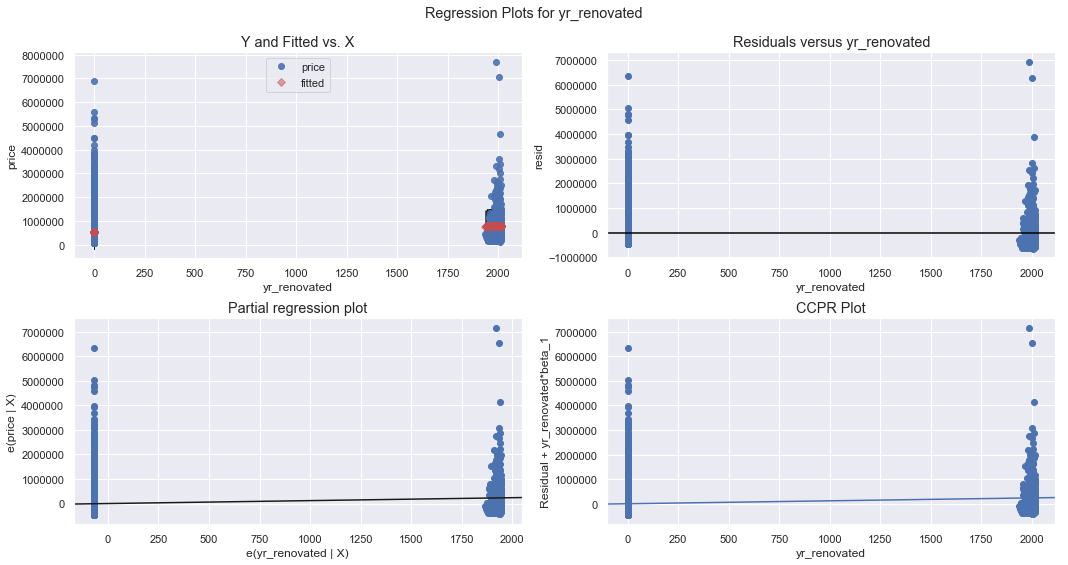

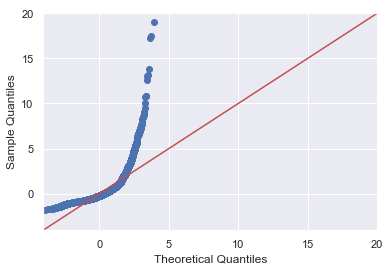

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~zipcode
-------------------------------------------------------------------------------------


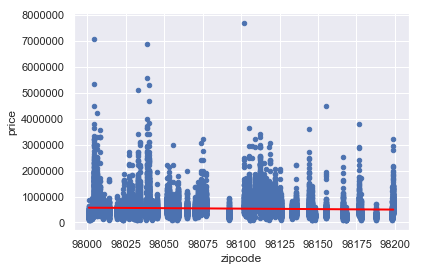

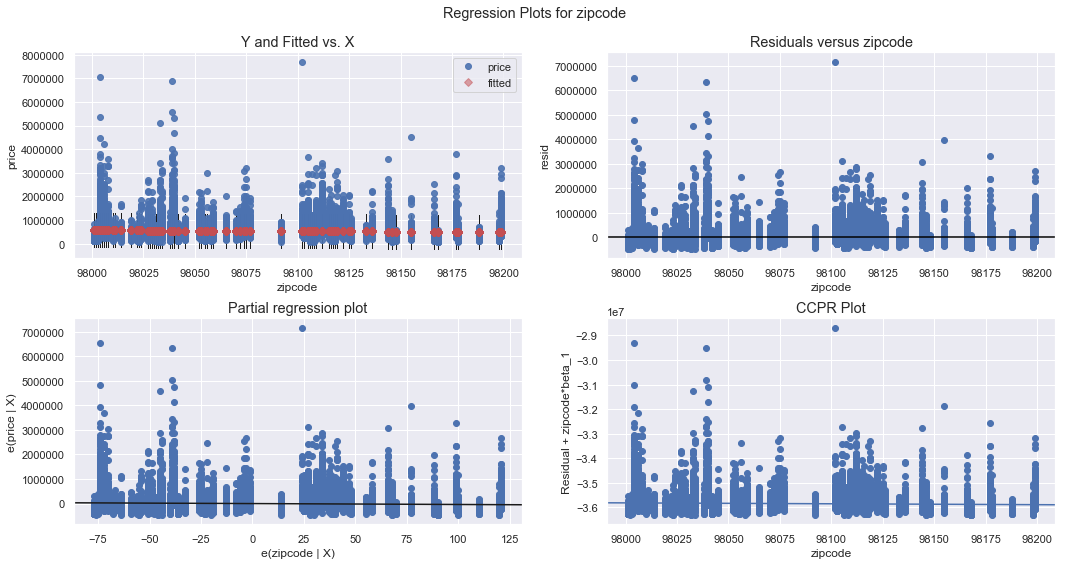

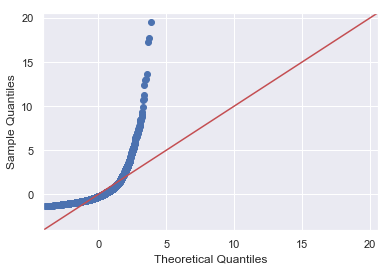

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_living15
-------------------------------------------------------------------------------------


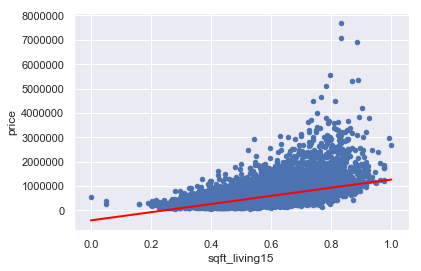

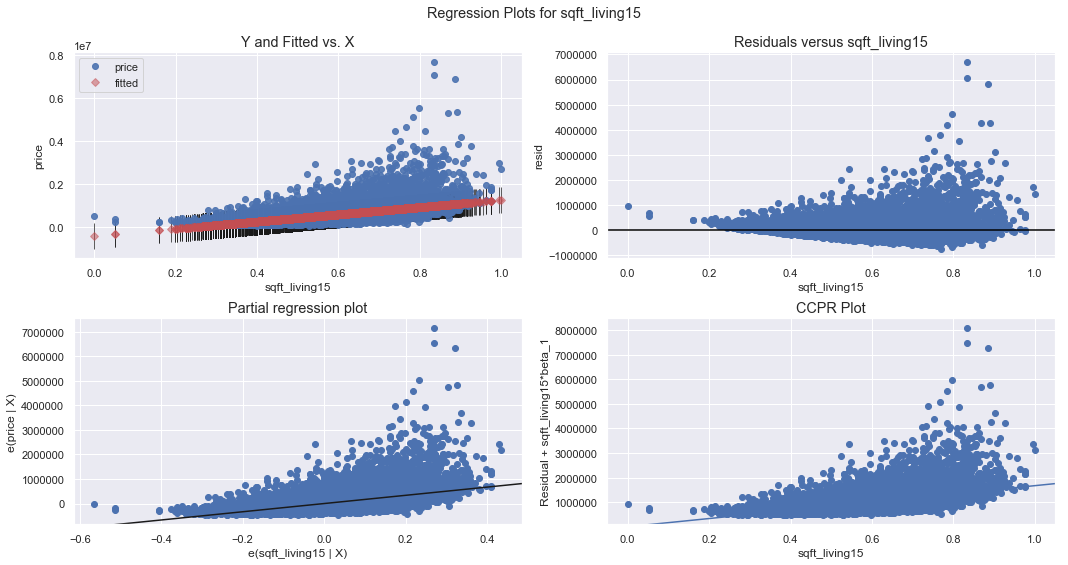

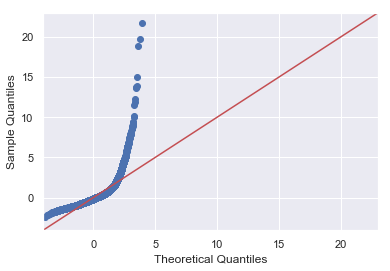

Press Enter to continue...
King County - Regression Analysis and Diagnostics for formula: Price~sqft_lot15
-------------------------------------------------------------------------------------


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


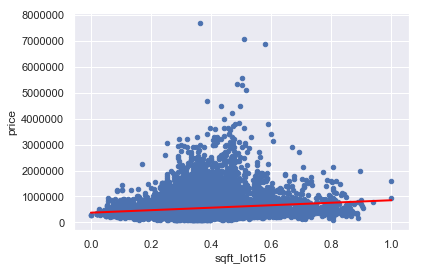

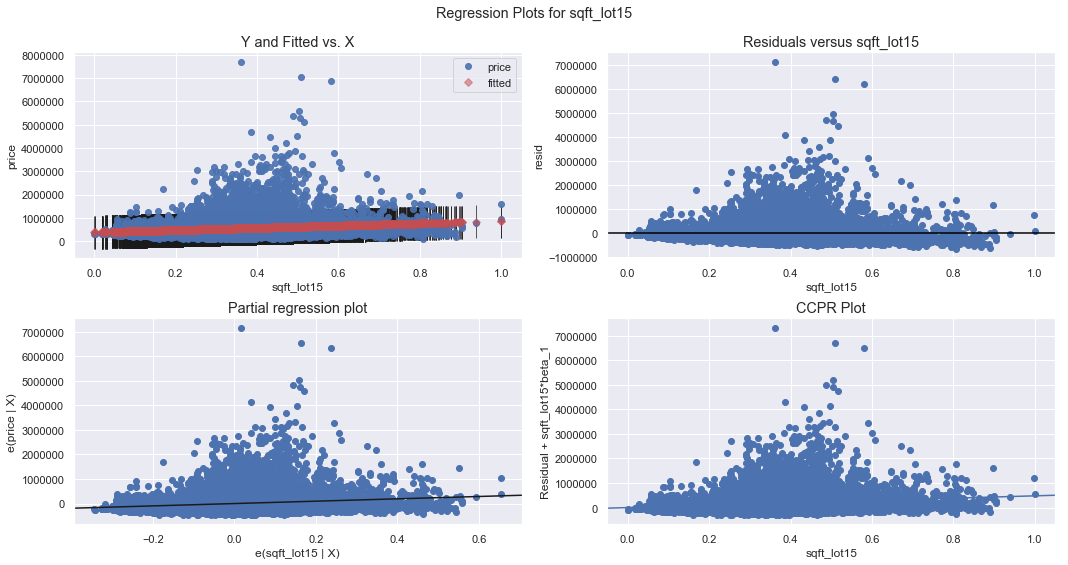

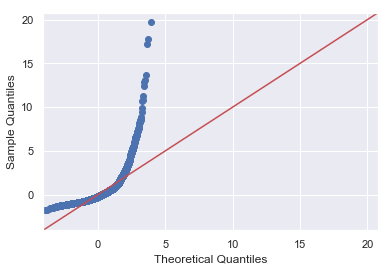

Press Enter to continue...
King County - Regression Analysis and Diagnostics for formula: Price~beds_(1, 2]
-------------------------------------------------------------------------------------


SyntaxError: invalid syntax (<unknown>, line 1)

In [70]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]

for idx, val in enumerate(X):
    print ("King County - Regression Analysis and Diagnostics for formula: Price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=final).fit()
    
    X_new = pd.DataFrame({val: [final[val].min(), final[val].max()]});
    preds = model.predict(X_new)
    final.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

The above code breaks when I get to the categorical data

In [71]:
results

[['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'],
 ['bedrooms',
  0.09944253852589502,
  108267.11670155608,
  128116.01011976073,
  0.0,
  1172385.4152132873],
 ['bathrooms',
  0.27582351026190444,
  8964.856492634795,
  251117.6632493523,
  0.0,
  883336.218922489],
 ['sqft_living',
  0.373844001702759,
  -326667.8365907801,
  1844476.7053335903,
  0.0,
  1658801.31335484],
 ['sqft_lot',
  0.025858760478052134,
  361095.06782893295,
  527965.8652024526,
  4.834812040584853e-125,
  1095723.9289988915],
 ['floors',
  0.065712076318591,
  279612.9565332419,
  174437.18700919388,
  0.0,
  1259421.2147336933],
 ['waterfront',
  0.15432056674355799,
  496252.5820291126,
  188733.84123237722,
  0.0,
  1080613.751043659],
 ['view',
  0.15432056674355799,
  496252.5820291126,
  188733.84123237722,
  0.0,
  1080613.751043659],
 ['condition',
  0.001309667913615864,
  470581.5618242899,
  20425.80219463913,
  1.0402817105513125e-07,
  1140315.5745274497],
 ['grade',


Do RFE and find more manageable set of variables to work with.

In [87]:
y = y
X = X

'''
preds = "+".join(X.columns)
formula = y + "~" + preds
model = smf(formula= y, data= X).fit()
'''

'''preds_int = sm.add_constant(X)
model = sm.OLS(y, preds_int).fit()'''

y.isna().sum()

price    2
dtype: int64

Make a train_test_split and runa few visualizations again

As a final check, run a k-fold test and narrow down our most effective predictors which still increase the (R^2?) by 1%